In [1]:
import numpy as np
import pandas as pd
#'Windows-1252'

In [2]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')
# import chardet
# with open('spam.csv', 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(100000))
# result

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5475,ham,Dhoni have luck to win some big title.so we wi...,NaN,NaN,NaN
3273,ham,Thanx a lot...,NaN,NaN,NaN
4745,ham,Orh i tot u say she now still dun believe.,NaN,NaN,NaN
2190,ham,"Ooh, 4got, i'm gonna start belly dancing in mo...",NaN,NaN,NaN
4610,ham,Wat time Ì_ finish?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Remove unnecessary ecolumns

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3140,ham,Customer place i will call you
638,ham,"What will we do in the shower, baby?"
3082,ham,K..k:)how about your training process?
2361,ham,Hi. I'm sorry i missed your call. Can you pls ...
4783,ham,Indeed and by the way it was either or - not b...


### Renaming columns

In [8]:
df.rename(columns = {
    'v1':'target',
    'v2': 'text'
},inplace = True)

In [9]:
df.sample(5)

,target,text
3137,ham,Wat r u doing now?
3554,spam,From next month get upto 50% More Calls 4 Ur s...
2445,ham,The guy (kadeem) hasn't been selling since the...
270,ham,"Come to mu, we're sorting out our narcotics si..."
3241,ham,Good Morning my Dear........... Have a great &...


In [10]:
# LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 2. EDA (Exploratory Data Analysis)

In [15]:
import matplotlib.pyplot as plt

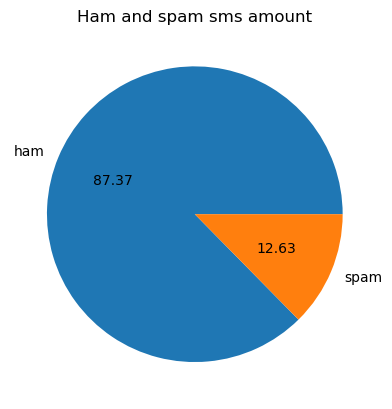

In [16]:
plt.pie(df['target'].value_counts(),labels= ['ham','spam'],autopct='%0.2f')
plt.title("Ham and spam sms amount")
plt.show()

In [17]:
#!pip install nltk

In [18]:
import nltk

In [19]:
# This will need to count specific item like num of charecters, num of words ,num of sentece;
#nltk.download('punkt')

In [20]:
df['text_charecters'] = df['text'].apply(len) # len is python keyword which calculated total value per row;just muskhosto

C:\Users\sahir\AppData\Local\Temp\ipykernel_53296\2539745079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_charecters'] = df['text'].apply(len) # len is python keyword which calculated total value per row;just muskhosto


In [21]:
df.rename(columns ={
    'text_charecters':'num_characters'
},inplace=True)

C:\Users\sahir\AppData\Local\Temp\ipykernel_53296\267093870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns ={


In [22]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # len use na kore 1bar try mere dekho output ki ashe
# taile e details bujhe jaba

C:\Users\sahir\AppData\Local\Temp\ipykernel_53296\4158739536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # len use na kore 1bar try mere dekho output ki ashe


In [23]:
df['num_sentence']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # len use na kore 1bar try mere dekho output ki ashe
# taile e details bujhe jaba

C:\Users\sahir\AppData\Local\Temp\ipykernel_53296\629910043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # len use na kore 1bar try mere dekho output ki ashe


In [24]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

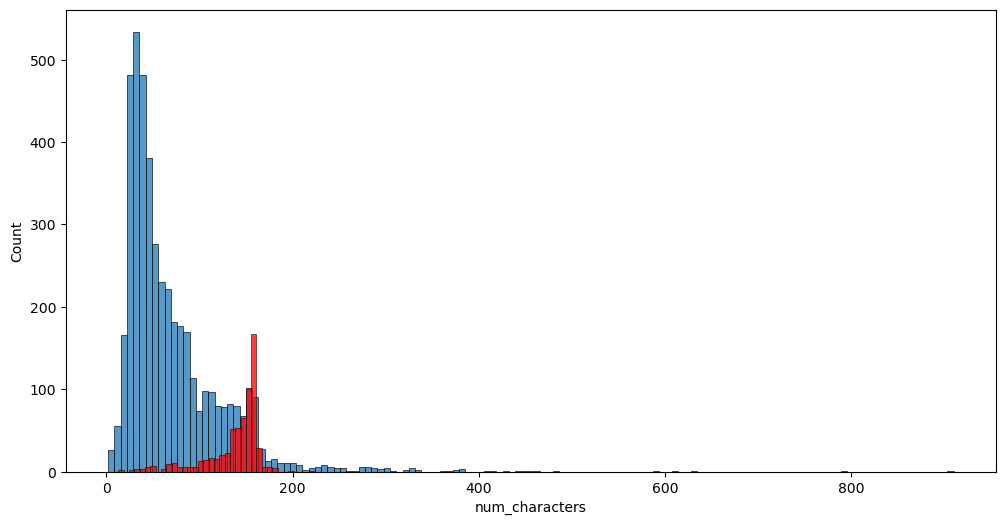

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color= 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

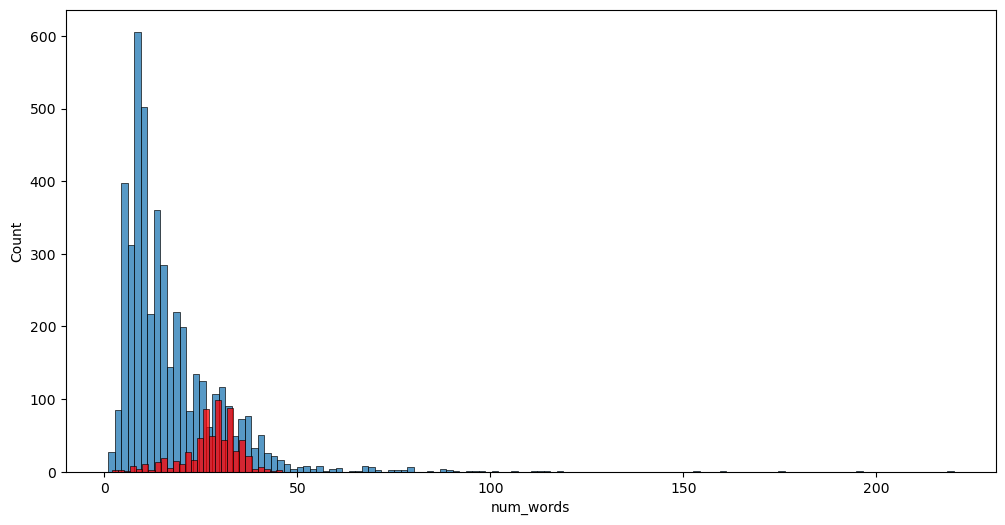

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color= 'red')

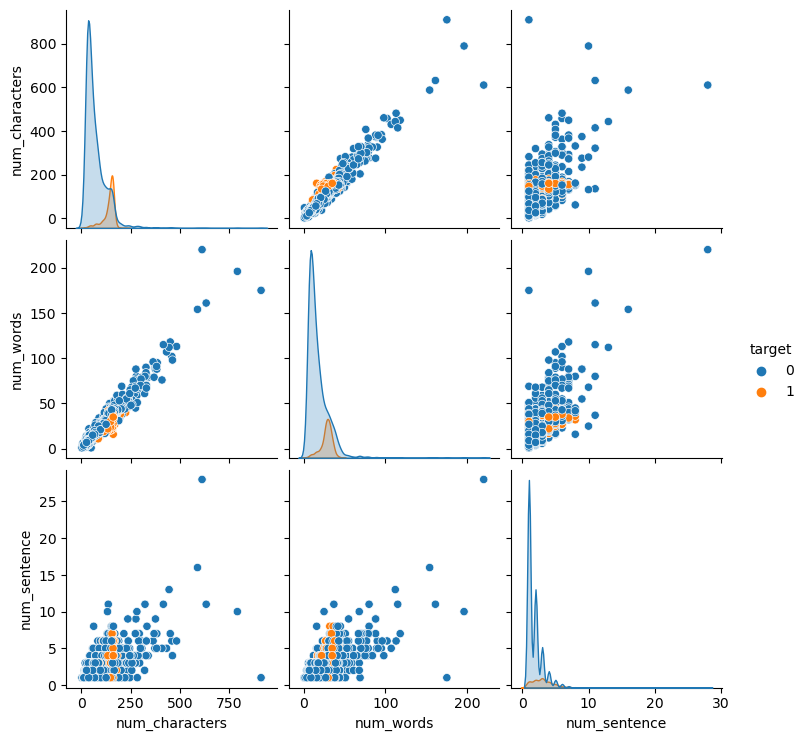

In [30]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

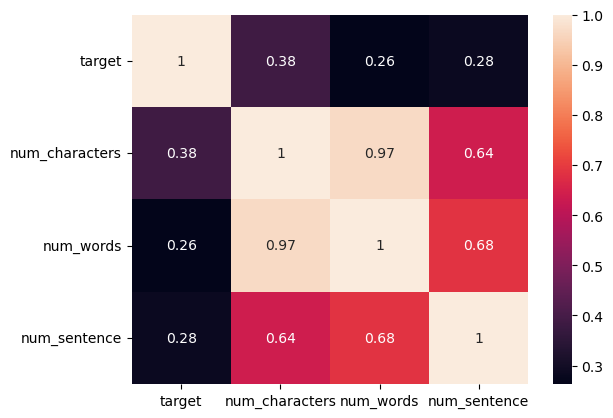

In [31]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [32]:
import string
from nltk.corpus import stopwords

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [34]:
def transform_Text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            i = ps.stem(i) # performing PortStemmer
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            y.append(i)
    return ' '.join(y)

In [35]:
transform_Text('I loved the YT lectures on Machine Learning. What about you &?')

'love yt lectur machin learn'

In [36]:
df['transformed_text'] = df['text'].apply(transform_Text)

C:\Users\sahir\AppData\Local\Temp\ipykernel_53296\742729350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_Text)


In [37]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail onli bugi n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [39]:
temp = df[df['target'] == 1]['transformed_text']

In [40]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

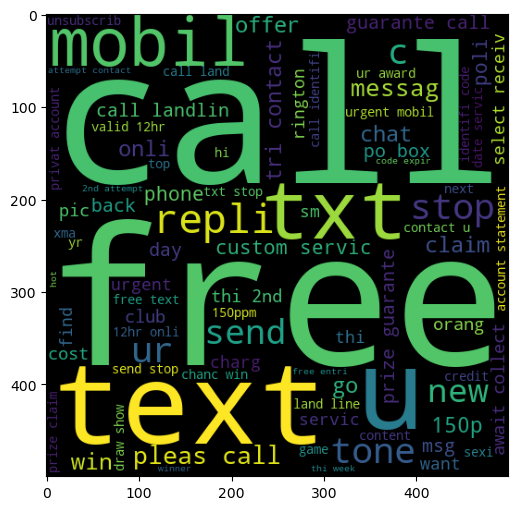

In [41]:
plt.figure(figsize=(16,6))
plt.imshow(spam_wc)

In [42]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep= " "))

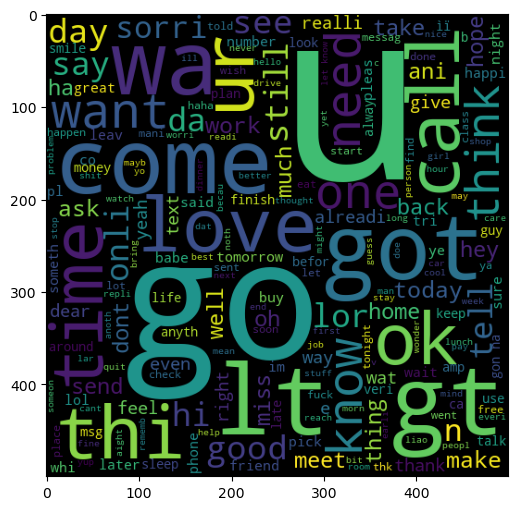

In [43]:
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)

In [44]:
listOfStrings = df[df['target']==1]['transformed_text'].tolist()

In [45]:
spam_words = []
for msg in listOfStrings:
    for word in msg.split():
        spam_words.append(word)

In [46]:
len(spam_words)

10161

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


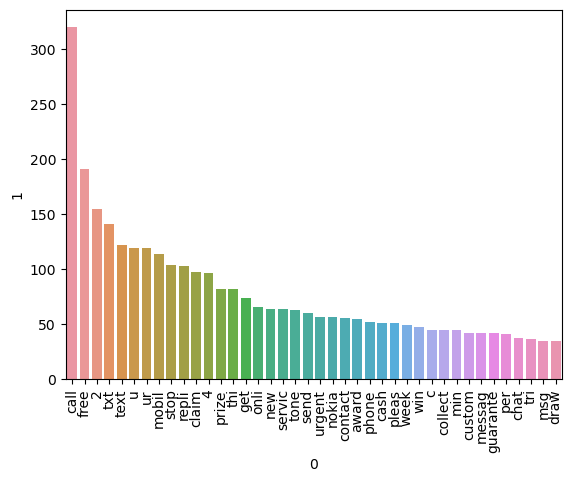

In [47]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(40))[0],pd.DataFrame(Counter(spam_words).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
listOfStringsOfHam = df[df['target']==0]['transformed_text'].tolist()

In [49]:
ham_words = []
for msg in listOfStringsOfHam:
    for word in msg.split():
        ham_words.append(word)

In [50]:
len(ham_words)

36409

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


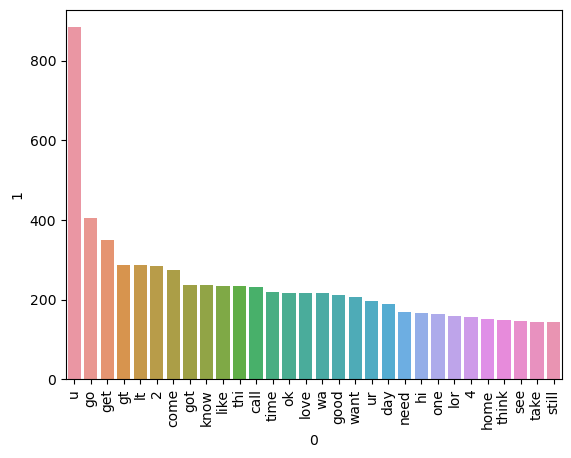

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0],pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [52]:
# Vectorization process  ( bagging technique)
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
#X = cv.fit_transform(df['transformed_text']).toarray()

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
X.shape

(5169, 6693)

In [55]:
Y = df['target'].values

In [56]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(xTrain,yTrain)
yPred1 = gnb.predict(xTest)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
print("For gaussian Naive Bayes: ")
print(accuracy_score(yTest,yPred1))
print(confusion_matrix(yTest,yPred1))
print(precision_score(yTest,yPred1))

For gaussian Naive Bayes: 
0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [62]:
mnb.fit(xTrain,yTrain)
yPred2 = mnb.predict(xTest)

print("For Multinomial Naive Bayes: ")
print(accuracy_score(yTest,yPred2))
print(confusion_matrix(yTest,yPred2))
print(precision_score(yTest,yPred2))

For Multinomial Naive Bayes: 
0.9584139264990329
[[896   0]
 [ 43  95]]
1.0


In [63]:
bnb.fit(xTrain,yTrain)
yPred3 = bnb.predict(xTest)

print("For Bernauli Naive Bayes: ")
print(accuracy_score(yTest,yPred3))
print(confusion_matrix(yTest,yPred3))
print(precision_score(yTest,yPred3))

For Bernauli Naive Bayes: 
0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [64]:
# tfidf --> MNB 
# copied below part from link: https://github.com/campusx-official/sms-spam-classifier/blob/main/sms-spam-detection.ipynb

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [71]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [72]:
train_classifier(svc,xTrain,yTrain,xTest,yTest)

(0.9738878143133463, 0.9743589743589743)

In [73]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,xTrain,yTrain,xTest,yTest)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9013539651837524
Precision -  1.0
For  NB
Accuracy -  0.9584139264990329
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8301886792452831
For  LR
Accuracy -  0.9497098646034816
Precision -  0.9215686274509803
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9224137931034483
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.875
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.897196261682243
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9365079365079365


In [74]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [75]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.901354,1.000000
2,NB,0.958414,1.000000
5,RF,0.973888,1.000000
8,ETC,0.973888,0.982609
0,SVC,0.973888,0.974359
10,xgb,0.972921,0.936508
6,AdaBoost,0.961315,0.922414
4,LR,0.949710,0.921569
9,GBDT,0.948743,0.897196
7,BgC,0.959381,0.875000


In [76]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.901354
1,NB,Accuracy,0.958414
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.973888
4,SVC,Accuracy,0.973888
5,xgb,Accuracy,0.972921
6,AdaBoost,Accuracy,0.961315
7,LR,Accuracy,0.949710
8,GBDT,Accuracy,0.948743
9,BgC,Accuracy,0.959381


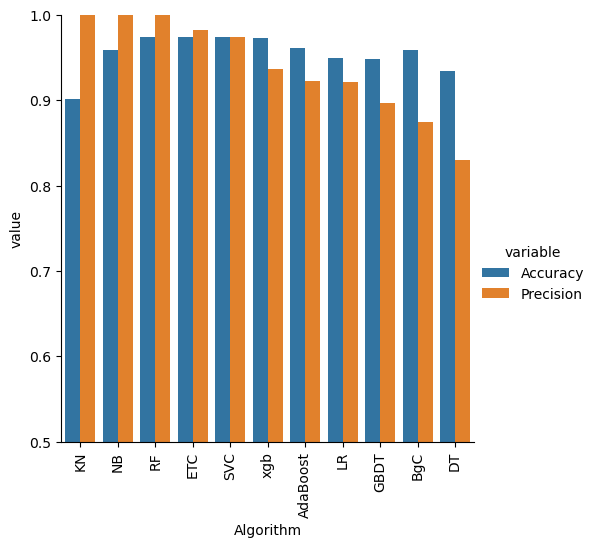

In [77]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000')

In [80]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [81]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [82]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [84]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.901354,1.000000,0.901354,1.000000,0.901354,1.000000,0.901354,1.000000
1,NB,0.958414,1.000000,0.958414,1.000000,0.958414,1.000000,0.958414,1.000000
2,RF,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
3,ETC,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
4,SVC,0.973888,0.974359,0.973888,0.974359,0.973888,0.974359,0.973888,0.974359
5,xgb,0.972921,0.936508,0.972921,0.936508,0.972921,0.936508,0.972921,0.936508
6,AdaBoost,0.961315,0.922414,0.961315,0.922414,0.961315,0.922414,0.961315,0.922414
7,LR,0.949710,0.921569,0.949710,0.921569,0.949710,0.921569,0.949710,0.921569
8,GBDT,0.948743,0.897196,0.948743,0.897196,0.948743,0.897196,0.948743,0.897196
9,BgC,0.959381,0.875000,0.959381,0.875000,0.959381,0.875000,0.959381,0.875000


In [85]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [86]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [87]:
voting.fit(xTrain,yTrain)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
mnb.fit(xTrain,yTrain)

MultinomialNB()

In [89]:
y_pred = voting.predict(xTest)
print("Accuracy",accuracy_score(yTest,y_pred))
print("Precision",precision_score(yTest,y_pred))

Accuracy 0.97678916827853
Precision 0.9913793103448276


In [90]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))